In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

1.


In [2]:

miu_zero = [-1, 1]
miu_one = [-2.5, 2.5]
miu_two = [-4.5, 4.5]

sigma = [1, 1]
samples = np.zeros([700, 3])
for i in range(700):
    miu_index = 0
    rand_index = np.random.rand()
    if rand_index >= 2/3:
        miu_index = 2
        sample = np.random.normal(miu_two, sigma)
    elif 1/3 < rand_index < 2/3:
        miu_index = 1
        sample = np.random.normal(miu_one, sigma)
    else:
        sample = np.random.normal(miu_zero, sigma)

    samples[i] = [sample[0], sample[1], miu_index]

2.

In [3]:
data = pd.DataFrame(samples, columns = ['x','y','label'])

miu_zero_df = data[data['label'] == 0]
miu_one_df = data[data['label'] == 1]
miu_two_df = data[data['label'] == 2]


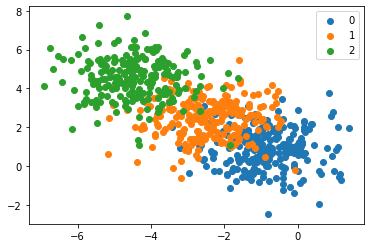

In [4]:
plt.scatter(x=miu_zero_df['x'], y=miu_zero_df['y'], label='0')
plt.scatter(x=miu_one_df['x'], y=miu_one_df['y'], label='1')
plt.scatter(x=miu_two_df['x'], y=miu_two_df['y'], label='2')
plt.legend()

3.

In [5]:

test_samples = np.zeros([300, 3])
for i in range(300):
    miu_index = 0
    rand_index = np.random.rand()
    if rand_index >= 2/3:
        miu_index = 2
        sample = np.random.normal(miu_two, sigma)
    elif 1/3 < rand_index < 2/3:
        miu_index = 1
        sample = np.random.normal(miu_one, sigma)
    else:
        sample = np.random.normal(miu_zero, sigma)

    test_samples[i] = [sample[0], sample[1], miu_index]
test_data = pd.DataFrame(test_samples, columns=['x', 'y', 'label'])

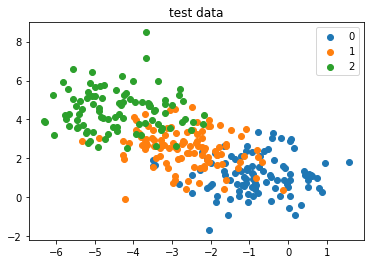

In [6]:

miu_zero_df = test_data[test_data['label'] == 0]
miu_one_df = test_data[test_data['label'] == 1]
miu_two_df = test_data[test_data['label'] == 2]

plt.scatter(x=miu_zero_df['x'], y=miu_zero_df['y'], label='0')
plt.scatter(x=miu_one_df['x'], y=miu_one_df['y'], label='1')
plt.scatter(x=miu_two_df['x'], y=miu_two_df['y'], label='2')
plt.legend()
plt.title('test data')

plt.show()

4.

In [8]:
k = 1
x_cols = ['x', 'y']
y_cols = 'label'
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X=data[x_cols], y=data[y_cols])
y_train_pred = model.predict(X=data[x_cols])
y_test_pred = model.predict(X=test_data[x_cols])

y_train_true = data[y_cols].values
y_test_true = test_data[y_cols].values
train_accuracy = np.sum(y_train_pred == y_train_true) / len(y_train_true)
test_accuracy = np.sum(y_test_pred == y_test_true) / len(y_test_true)
print(train_accuracy)  # 1
print(test_accuracy)  # 0.82666

1.0
0.7766666666666666


classification error rate on train : 1.0
classification error rate on test : 0.77666666

5.
expected to increase accuracy with increase in K in the test set.

In [9]:
accuracies = []
for i in range(1, 21):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=data[x_cols], y=data[y_cols])
    y_train_pred = model.predict(X=data[x_cols])
    y_test_pred = model.predict(X=test_data[x_cols])

    y_train_true = data[y_cols].values
    y_test_true = test_data[y_cols].values
    train_accuracy = np.sum(y_train_pred == y_train_true) / len(y_train_true)
    test_accuracy = np.sum(y_test_pred == y_test_true) / len(y_test_true)
    accuracies.append([1- train_accuracy, 1- test_accuracy])

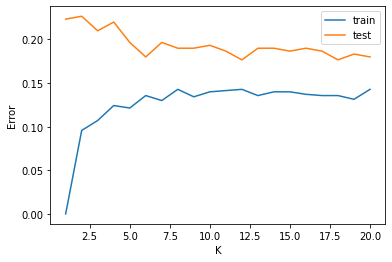

In [10]:
plt.plot( range(1,21), np.transpose(accuracies)[0], label='train')
plt.plot( range(1,21), np.transpose(accuracies)[1], label='test')
plt.xlabel("K")
plt.ylabel("Error")
plt.legend()
plt.show()

the test error decreased with k increase, matched expectations
the test not always decrease with k , for example at the graph we got we have the error increase from k=10 to k=~13



6.
we expect the error to decrease with mtrain-i increase:

In [11]:
def build_train(train_size):
    samples = np.zeros([train_size, 3])
    for i in range(train_size):
        miu_index = 0
        rand_index = np.random.rand()
        if rand_index >= 2 / 3:
            miu_index = 2
            sample = np.random.normal(miu_two, sigma)
        elif 1 / 3 < rand_index < 2 / 3:
            miu_index = 1
            sample = np.random.normal(miu_one, sigma)
        else:
            sample = np.random.normal(miu_zero, sigma)

        samples[i] = [sample[0], sample[1], miu_index]

    data = pd.DataFrame(samples, columns=['x', 'y', 'label'])
    return data


In [12]:
accuracies = []

new_test = build_train(100)
for i in range(10, 41, 5):
    k = 10
    data = build_train(i)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=data[x_cols], y=data[y_cols])
    y_train_pred = model.predict(X=data[x_cols])
    y_test_pred = model.predict(X=new_test[x_cols])

    y_train_true = data[y_cols].values
    y_test_true = new_test[y_cols].values
    train_accuracy = np.sum(y_train_pred == y_train_true) / len(y_train_true)
    test_accuracy = np.sum(y_test_pred == y_test_true) / len(y_test_true)
    accuracies.append([1- train_accuracy, 1- test_accuracy])
print(accuracies)


[[0.5, 0.7], [0.4, 0.39], [0.09999999999999998, 0.18000000000000005], [0.07999999999999996, 0.30000000000000004], [0.09999999999999998, 0.15000000000000002], [0.1428571428571429, 0.16000000000000003], [0.19999999999999996, 0.16000000000000003]]


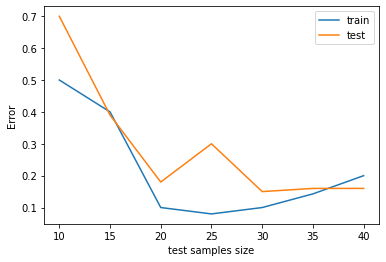

In [16]:
plt.plot( range(10, 41, 5), np.transpose(accuracies)[0], label='train')
plt.plot( range(10, 41, 5), np.transpose(accuracies)[1], label='test')
plt.xlabel("test samples size")
plt.ylabel("Error")
plt.legend()
plt.show()

as we expected the error was overall decreasing, but the graph was erratic due to low train size.


7. Yes, the plots change between the trials. Not always meet our expectations (from step 6) at every trial but the general trend is descending
8. Suggest a variation of a k-NN classifier where the distances of the neighbors are taken into account in the prediction (No need to implement anything in code).